### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [0]:
import tensorflow as tf
tf.enable_eager_execution()
tf.set_random_seed(42)

In [2]:
tf.__version__

'1.13.1'

### Collect Data

In [3]:
import keras

Using TensorFlow backend.


In [0]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

In [5]:
print(trainY[0:10])

[9 0 0 3 0 2 7 2 5 5]


In [6]:
print(testY[0:10])

[9 2 1 1 6 1 4 6 5 7]


In [7]:
print('Number of Training examples: ', trainX.shape[0])

('Number of Training examples: ', 60000)


In [8]:
print('Number of Testing examples: ', testX.shape[0])

('Number of Testing examples: ', 10000)


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [0]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

### Visualize the data

Plot first 10 images in the triaining set and their labels.

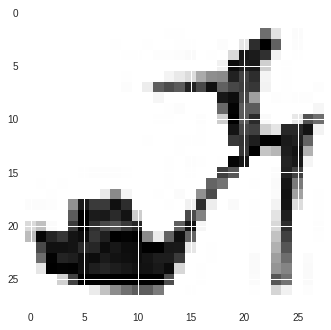

In [10]:
import matplotlib.pyplot as plt
ds = [0,1,2,3,4,5,6,7,8,9]
for i in ds:
  plt.imshow(trainX[i])

In [0]:
#tf.keras.preprocessing.image.array_to_img.

In [12]:
print('First 10 examples now in training set are: ', trainY[0:10])

('First 10 examples now in training set are: ', array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32))


### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

In [0]:
#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

In [15]:
#Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
#Comile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model using model.fit()

In [17]:
model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=10,
          batch_size=100)

Train on 60000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 2s 30us/sample - loss: 11.8220 - acc: 0.2663 - val_loss: 11.5685 - val_acc: 0.2819
Epoch 2/10
60000/60000 [==============================] - 1s 23us/sample - loss: 11.4578 - acc: 0.2888 - val_loss: 11.4465 - val_acc: 0.2897
Epoch 3/10
60000/60000 [==============================] - 1s 24us/sample - loss: 11.3881 - acc: 0.2934 - val_loss: 11.3613 - val_acc: 0.2950
Epoch 4/10
60000/60000 [==============================] - 1s 24us/sample - loss: 11.3651 - acc: 0.2948 - val_loss: 11.3678 - val_acc: 0.2947
Epoch 5/10
60000/60000 [==============================] - 1s 23us/sample - loss: 11.3687 - acc: 0.2946 - val_loss: 11.4600 - val_acc: 0.2890
Epoch 6/10
60000/60000 [==============================] - 1s 23us/sample - loss: 11.3922 - acc: 0.2931 - val_loss: 11.3932 - val_acc: 0.2931
Epoch 7/10
60000/60000 [==============================] 

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [0]:
#Recreate Model with the batch normalisation technique
modelb = tf.keras.models.Sequential()
modelb.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))
modelb.add(tf.keras.layers.BatchNormalization())
modelb.add(tf.keras.layers.Dense(10, activation='softmax'))
modelb.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model

In [19]:
modelb.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=10,
          batch_size=100)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.6819 - acc: 0.7674 - val_loss: 0.5716 - val_acc: 0.8037
Epoch 2/10
60000/60000 [==============================] - 2s 39us/sample - loss: 0.5189 - acc: 0.8223 - val_loss: 0.5269 - val_acc: 0.8209
Epoch 3/10
60000/60000 [==============================] - 2s 40us/sample - loss: 0.4867 - acc: 0.8335 - val_loss: 0.5073 - val_acc: 0.8259
Epoch 4/10
60000/60000 [==============================] - 2s 38us/sample - loss: 0.4695 - acc: 0.8403 - val_loss: 0.4915 - val_acc: 0.8313
Epoch 5/10
60000/60000 [==============================] - 2s 40us/sample - loss: 0.4581 - acc: 0.8426 - val_loss: 0.4921 - val_acc: 0.8311
Epoch 6/10
60000/60000 [==============================] - 2s 38us/sample - loss: 0.4493 - acc: 0.8458 - val_loss: 0.4802 - val_acc: 0.8332
Epoch 7/10
60000/60000 [==============================] - 2s 40us/sample - loss: 0.4427 - acc: 0.8490 - val_loss: 0.

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [0]:
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.001)
modelb.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
modelb.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=10,
          batch_size=100)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.4237 - acc: 0.8547 - val_loss: 0.4629 - val_acc: 0.8397
Epoch 2/10
60000/60000 [==============================] - 2s 39us/sample - loss: 0.4233 - acc: 0.8546 - val_loss: 0.4673 - val_acc: 0.8402
Epoch 3/10
60000/60000 [==============================] - 2s 39us/sample - loss: 0.4220 - acc: 0.8557 - val_loss: 0.4634 - val_acc: 0.8390
Epoch 4/10
60000/60000 [==============================] - 2s 40us/sample - loss: 0.4222 - acc: 0.8554 - val_loss: 0.4662 - val_acc: 0.8399
Epoch 5/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.4216 - acc: 0.8543 - val_loss: 0.4637 - val_acc: 0.8393
Epoch 6/10
60000/60000 [==============================] - 2s 40us/sample - loss: 0.4205 - acc: 0.8553 - val_loss: 0.4624 - val_acc: 0.8403
Epoch 7/10
60000/60000 [==============================] - 2s 38us/sample - loss: 0.4209 - acc: 0.8554 - val_loss: 0.

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [0]:
#Recreate Dense Model with the batch normalisation technique
modelc = tf.keras.models.Sequential()

In [0]:
modelc.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

In [0]:
modelc.add(tf.keras.layers.BatchNormalization())

In [0]:
#Add 1st hidden layer
modelc.add(tf.keras.layers.Dense(100, activation='sigmoid'))
modelc.add(tf.keras.layers.Dense(100, activation='sigmoid'))
modelc.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)
modelc.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

## Review model

In [27]:
modelc.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_v1_1 (Ba (None, 784)               3136      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 92,746
Trainable params: 91,178
Non-trainable params: 1,568
_________________________________________________________________


### Run the model

In [28]:
modelc.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=30,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 7s 124us/sample - loss: 1.0432 - acc: 0.6885 - val_loss: 0.6387 - val_acc: 0.7746
Epoch 2/30
60000/60000 [==============================] - 7s 115us/sample - loss: 0.5779 - acc: 0.7959 - val_loss: 0.5228 - val_acc: 0.8106
Epoch 3/30
60000/60000 [==============================] - 7s 118us/sample - loss: 0.4977 - acc: 0.8230 - val_loss: 0.4715 - val_acc: 0.8287
Epoch 4/30
60000/60000 [==============================] - 7s 124us/sample - loss: 0.4588 - acc: 0.8359 - val_loss: 0.4516 - val_acc: 0.8376
Epoch 5/30
60000/60000 [==============================] - 8s 125us/sample - loss: 0.4354 - acc: 0.8449 - val_loss: 0.4354 - val_acc: 0.8401
Epoch 6/30
60000/60000 [==============================] - 8s 140us/sample - loss: 0.4196 - acc: 0.8492 - val_loss: 0.4169 - val_acc: 0.8463
Epoch 7/30
60000/60000 [==============================] - 8s 137us/sample - loss: 0.4020 - acc: 0.8564 - val_l